In [1]:
# Hello guys. I am self learning python for data science. I hope you enjoy my work :)

In [2]:
# FOOD ANALYSIS

In [3]:
# Imports

In [4]:
import pandas as pd
import numpy as np
from IPython.display import display 
import matplotlib.pyplot as plt
pd.options.mode.chained_assignment = None
from functools import reduce

In [5]:
#Loading and Observing data

In [6]:
df = pd.read_csv("../input/the-nutritional-content-of-food-a-comprehensive/ABBREV.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8790 entries, 0 to 8789
Data columns (total 54 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              8790 non-null   int64  
 1   NDB_No             8790 non-null   int64  
 2   Shrt_Desc          8790 non-null   object 
 3   Water_(g)          8789 non-null   float64
 4   Energ_Kcal         8790 non-null   int64  
 5   Protein_(g)        8790 non-null   float64
 6   Lipid_Tot_(g)      8790 non-null   float64
 7   Ash_(g)            8465 non-null   float64
 8   Carbohydrt_(g)     8790 non-null   float64
 9   Fiber_TD_(g)       8196 non-null   float64
 10  Sugar_Tot_(g)      6958 non-null   float64
 11  Calcium_(mg)       8442 non-null   float64
 12  Iron_(mg)          8646 non-null   float64
 13  Magnesium_(mg)     8051 non-null   float64
 14  Phosphorus_(mg)    8211 non-null   float64
 15  Potassium_(mg)     8364 non-null   float64
 16  Sodium_(mg)        8707 

In [7]:
#Whoa, 54 columns of food elements! Let's display all the columns, so we can select only these we heard of.

In [8]:
pd.options.display.max_columns = None
display(df)

,index,NDB_No,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Lipid_Tot_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Potassium_(mg),Sodium_(mg),Zinc_(mg),Copper_mg),Manganese_(mg),Selenium_(µg),Vit_C_(mg),Thiamin_(mg),Riboflavin_(mg),Niacin_(mg),Panto_Acid_mg),Vit_B6_(mg),Folate_Tot_(µg),Folic_Acid_(µg),Food_Folate_(µg),Folate_DFE_(µg),Choline_Tot_ (mg),Vit_B12_(µg),Vit_A_IU,Vit_A_RAE,Retinol_(µg),Alpha_Carot_(µg),Beta_Carot_(µg),Beta_Crypt_(µg),Lycopene_(µg),Lut+Zea_ (µg),Vit_E_(mg),Vit_D_µg,Vit_D_IU,Vit_K_(µg),FA_Sat_(g),FA_Mono_(g),FA_Poly_(g),Cholestrl_(mg),GmWt_1,GmWt_Desc1,GmWt_2,GmWt_Desc2,Refuse_Pct
0,0,1001,"BUTTER,WITH SALT",15.87,717,0.85,81.11,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,24.0,643.0,0.09,0.000,0.000,1.0,0.0,0.005,0.034,0.042,0.110,0.003,3.0,0.0,3.0,3.0,18.8,0.17,2499.0,684.0,671.0,0.0,158.0,0.0,0.0,0.0,2.32,0.0,0.0,7.0,51.368,21.021,3.043,215.0,5.00,"1 pat, (1"" sq, 1/3"" high)",14.2,1 tbsp,0.0
1,1,1002,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,78.30,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,41.0,583.0,0.05,0.010,0.001,0.0,0.0,0.007,0.064,0.022,0.097,0.008,4.0,0.0,4.0,4.0,18.8,0.07,2468.0,683.0,671.0,1.0,135.0,6.0,0.0,13.0,1.37,0.0,0.0,4.6,45.390,19.874,3.331,225.0,3.80,"1 pat, (1"" sq, 1/3"" high)",9.4,1 tbsp,0.0
2,2,1003,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,99.48,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,5.0,2.0,0.01,0.001,0.000,0.0,0.0,0.001,0.005,0.003,0.010,0.001,0.0,0.0,0.0,0.0,22.3,0.01,3069.0,840.0,824.0,0.0,193.0,0.0,0.0,0.0,2.80,0.0,0.0,8.6,61.924,28.732,3.694,256.0,12.80,1 tbsp,205.0,1 cup,0.0
3,3,1004,"CHEESE,BLUE",42.41,353,21.40,28.74,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,256.0,1146.0,2.66,0.040,0.009,14.5,0.0,0.029,0.382,1.016,1.729,0.166,36.0,0.0,36.0,36.0,15.4,1.22,721.0,198.0,192.0,0.0,74.0,0.0,0.0,0.0,0.25,0.5,21.0,2.4,18.669,7.778,0.800,75.0,28.35,1 oz,17.0,1 cubic inch,0.0
4,4,1005,"CHEESE,BRICK",41.11,371,23.24,29.68,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,136.0,560.0,2.60,0.024,0.012,14.5,0.0,0.014,0.351,0.118,0.288,0.065,20.0,0.0,20.0,20.0,15.4,1.26,1080.0,292.0,286.0,0.0,76.0,0.0,0.0,0.0,0.26,0.5,22.0,2.5,18.764,8.598,0.784,94.0,132.00,"1 cup, diced",113.0,"1 cup, shredded",0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8785,8785,83110,"MACKEREL,SALTED",43.00,305,18.50,25.10,13.40,0.00,0.0,0.00,66.0,1.40,60.0,254.0,520.0,4450.0,1.10,0.100,NaN,73.4,0.0,0.020,0.190,3.300,NaN,0.410,15.0,0.0,15.0,15.0,101.6,12.00,157.0,47.0,47.0,0.0,0.0,0.0,0.0,0.0,2.38,25.2,1006.0,7.8,7.148,8.320,6.210,95.0,80.00,"1 piece, (5-1/2"" x 1-1/2"" x 1/2"")",17.0,"1 cubic inch, boneless",0.0
8786,8786,90240,"SCALLOP,(BAY&SEA),CKD,STMD",70.25,111,20.54,0.84,2.97,5.41,0.0,0.00,10.0,0.58,37.0,426.0,314.0,667.0,1.55,0.033,0.029,21.7,0.0,0.012,0.024,1.076,0.366,0.112,20.0,0.0,20.0,20.0,110.7,2.15,5.0,2.0,2.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,2.0,0.0,0.218,0.082,0.222,41.0,85.00,3 oz,NaN,NaN,0.0
8787,8787,90480,"SYRUP,CANE",26.00,269,0.00,0.00,0.86,73.14,0.0,73.20,13.0,3.60,10.0,8.0,63.0,58.0,0.19,0.020,NaN,0.7,0.0,0.130,0.060,0.100,NaN,0.000,0.0,0.0,0.0,0.0,NaN,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.000,0.000,0.000,0.0,21.00,1 serving,NaN,NaN,0.0
8788,8788,90560,"SNAIL,RAW",79.20,90,16.10,1.40,1.30,2.00,0.0,0.00,10.0,3.50,250.0,272.0,382.0,70.0,1.00,0.400,NaN,27.4,0.0,0.010,0.120,1.400,NaN,0.130,6.0,0.0,6.0,6.0,65.0,0.50,100.0,30.0,30.0,0.0,0.0,0.0,0.0,0.0,5.00,0.0,0.0,0.1,0.361,0.259,0.252,50.0,85.00,3 oz,NaN,NaN,0.0


In [9]:
#Ok, we know nearly half of the elements in the columns. Let's select them.

In [10]:
df = df[['Shrt_Desc', 'Water_(g)','Energ_Kcal','Protein_(g)','Ash_(g)','Carbohydrt_(g)','Fiber_TD_(g)','Sugar_Tot_(g)','Calcium_(mg)','Iron_(mg)','Magnesium_(mg)','Phosphorus_(mg)','Zinc_(mg)','Vit_C_(mg)','Vit_B6_(mg)','Folic_Acid_(µg)','Vit_B12_(µg)','Vit_A_IU','Vit_E_(mg)','Vit_D_µg','Vit_K_(µg)']]

In [11]:
df.head(10)

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Zinc_(mg),Vit_C_(mg),Vit_B6_(mg),Folic_Acid_(µg),Vit_B12_(µg),Vit_A_IU,Vit_E_(mg),Vit_D_µg,Vit_K_(µg)
0,"BUTTER,WITH SALT",15.87,717,0.85,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,0.09,0.0,0.003,0.0,0.17,2499.0,2.32,0.0,7.0
1,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,0.05,0.0,0.008,0.0,0.07,2468.0,1.37,0.0,4.6
2,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,0.01,0.0,0.001,0.0,0.01,3069.0,2.80,0.0,8.6
3,"CHEESE,BLUE",42.41,353,21.40,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,2.66,0.0,0.166,0.0,1.22,721.0,0.25,0.5,2.4
4,"CHEESE,BRICK",41.11,371,23.24,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,2.60,0.0,0.065,0.0,1.26,1080.0,0.26,0.5,2.5
5,"CHEESE,BRIE",48.42,334,20.75,2.70,0.45,0.0,0.45,184.0,0.50,20.0,188.0,2.38,0.0,0.235,0.0,1.65,592.0,0.24,0.5,2.3
6,"CHEESE,CAMEMBERT",51.80,300,19.80,3.68,0.46,0.0,0.46,388.0,0.33,20.0,347.0,2.38,0.0,0.227,0.0,1.30,820.0,0.21,0.4,2.0
7,"CHEESE,CARAWAY",39.28,376,25.18,3.28,3.06,0.0,NaN,673.0,0.64,22.0,490.0,2.94,0.0,0.074,0.0,0.27,1054.0,NaN,NaN,NaN
8,"CHEESE,CHEDDAR",37.02,404,22.87,3.71,3.09,0.0,0.48,710.0,0.14,27.0,455.0,3.64,0.0,0.066,0.0,1.10,1242.0,0.71,0.6,2.4
9,"CHEESE,CHESHIRE",37.65,387,23.37,3.60,4.78,0.0,NaN,643.0,0.21,21.0,464.0,2.79,0.0,0.074,0.0,0.83,985.0,NaN,NaN,NaN


In [12]:
# That's better...but we have some NaN. We need to get rid of them. Let's convert them to 0!

In [13]:
df.fillna(0, inplace=True)
df.head(10)

,Shrt_Desc,Water_(g),Energ_Kcal,Protein_(g),Ash_(g),Carbohydrt_(g),Fiber_TD_(g),Sugar_Tot_(g),Calcium_(mg),Iron_(mg),Magnesium_(mg),Phosphorus_(mg),Zinc_(mg),Vit_C_(mg),Vit_B6_(mg),Folic_Acid_(µg),Vit_B12_(µg),Vit_A_IU,Vit_E_(mg),Vit_D_µg,Vit_K_(µg)
0,"BUTTER,WITH SALT",15.87,717,0.85,2.11,0.06,0.0,0.06,24.0,0.02,2.0,24.0,0.09,0.0,0.003,0.0,0.17,2499.0,2.32,0.0,7.0
1,"BUTTER,WHIPPED,W/ SALT",16.72,718,0.49,1.62,2.87,0.0,0.06,23.0,0.05,1.0,24.0,0.05,0.0,0.008,0.0,0.07,2468.0,1.37,0.0,4.6
2,"BUTTER OIL,ANHYDROUS",0.24,876,0.28,0.00,0.00,0.0,0.00,4.0,0.00,0.0,3.0,0.01,0.0,0.001,0.0,0.01,3069.0,2.80,0.0,8.6
3,"CHEESE,BLUE",42.41,353,21.40,5.11,2.34,0.0,0.50,528.0,0.31,23.0,387.0,2.66,0.0,0.166,0.0,1.22,721.0,0.25,0.5,2.4
4,"CHEESE,BRICK",41.11,371,23.24,3.18,2.79,0.0,0.51,674.0,0.43,24.0,451.0,2.60,0.0,0.065,0.0,1.26,1080.0,0.26,0.5,2.5
5,"CHEESE,BRIE",48.42,334,20.75,2.70,0.45,0.0,0.45,184.0,0.50,20.0,188.0,2.38,0.0,0.235,0.0,1.65,592.0,0.24,0.5,2.3
6,"CHEESE,CAMEMBERT",51.80,300,19.80,3.68,0.46,0.0,0.46,388.0,0.33,20.0,347.0,2.38,0.0,0.227,0.0,1.30,820.0,0.21,0.4,2.0
7,"CHEESE,CARAWAY",39.28,376,25.18,3.28,3.06,0.0,0.00,673.0,0.64,22.0,490.0,2.94,0.0,0.074,0.0,0.27,1054.0,0.00,0.0,0.0
8,"CHEESE,CHEDDAR",37.02,404,22.87,3.71,3.09,0.0,0.48,710.0,0.14,27.0,455.0,3.64,0.0,0.066,0.0,1.10,1242.0,0.71,0.6,2.4
9,"CHEESE,CHESHIRE",37.65,387,23.37,3.60,4.78,0.0,0.00,643.0,0.21,21.0,464.0,2.79,0.0,0.074,0.0,0.83,985.0,0.00,0.0,0.0


In [14]:
#Before we start the analysis let's check what we got after the formatting and cleaning

In [15]:
df.info

<bound method DataFrame.info of                        Shrt_Desc  Water_(g)  Energ_Kcal  Protein_(g)  Ash_(g)  \
0               BUTTER,WITH SALT      15.87         717         0.85     2.11   
1         BUTTER,WHIPPED,W/ SALT      16.72         718         0.49     1.62   
2           BUTTER OIL,ANHYDROUS       0.24         876         0.28     0.00   
3                    CHEESE,BLUE      42.41         353        21.40     5.11   
4                   CHEESE,BRICK      41.11         371        23.24     3.18   
...                          ...        ...         ...          ...      ...   
8785             MACKEREL,SALTED      43.00         305        18.50    13.40   
8786  SCALLOP,(BAY&SEA),CKD,STMD      70.25         111        20.54     2.97   
8787                  SYRUP,CANE      26.00         269         0.00     0.86   
8788                   SNAIL,RAW      79.20          90        16.10     1.30   
8789            TURTLE,GREEN,RAW      78.50          89        19.80     1.20

In [16]:
#We have 8790 types of food with 21 different elements to explore. Let's begin the analysis with the most sweet foods.

In [17]:
df_sweet = df[['Shrt_Desc','Sugar_Tot_(g)']]
df_sweet

,Shrt_Desc,Sugar_Tot_(g)
0,"BUTTER,WITH SALT",0.06
1,"BUTTER,WHIPPED,W/ SALT",0.06
2,"BUTTER OIL,ANHYDROUS",0.00
3,"CHEESE,BLUE",0.50
4,"CHEESE,BRICK",0.51
...,...,...
8785,"MACKEREL,SALTED",0.00
8786,"SCALLOP,(BAY&SEA),CKD,STMD",0.00
8787,"SYRUP,CANE",73.20
8788,"SNAIL,RAW",0.00


In [18]:
# Im prety sure Butter with salt isn't my favorite dessert, let's see top 30 sweet foods

In [19]:
df_sweet_top_30 = df_sweet.nlargest(30,'Sugar_Tot_(g)').reset_index(drop=True)
df_sweet_top_30

,Shrt_Desc,Sugar_Tot_(g)
0,"SUGARS,GRANULATED",99.80
1,"SUGAR,TURBINADO",99.19
2,"SUGARS,POWDERED",97.81
3,"BEVERAGES,WHISKEY SOUR MIX,PDR",97.30
4,"BEVERAGES,LEMONADE-FLAVOR DRK,PDR",97.15
5,"SUGARS,BROWN",97.02
6,"STRAWBERRY-FLAVOR BEV MIX,PDR",95.45
7,"BEVERAGES,TEA,INST,DECAFFEINATED,LEMON,SWTND",95.29
8,"BEVERAGES,TEA,INST,LEMON,SWTND,PDR",95.29
9,"BEVERAGES,LEMONADE,PDR",94.70


In [20]:
#Why the hell dehydrated apples are so sweet(position 20)? Let's see these 30 in graph.

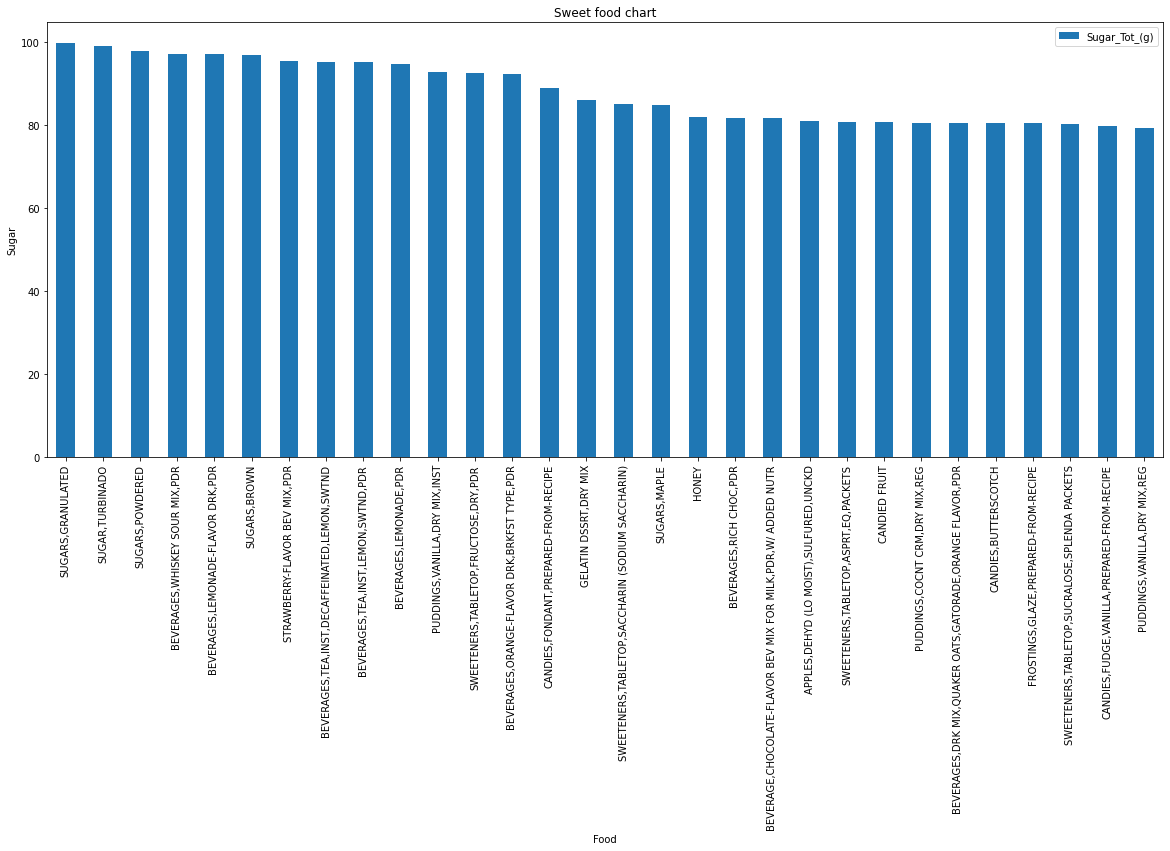

In [21]:
df_sweet_top_30.plot(x='Shrt_Desc', y='Sugar_Tot_(g)',kind="bar",figsize=(20, 8))  
plt.xlabel('Food')
plt.xticks(rotation=90)
plt.ylabel('Sugar')
plt.title('Sweet food chart')
plt.show()

In [22]:
#Okay, now we know what to avoid:Beverages,pudding,candies,alcohol....and dried apples (this is new). Now let's see which foods provide the most vitamins.

In [23]:
df_vitamins = df[['Shrt_Desc','Vit_C_(mg)','Vit_B6_(mg)','Vit_B12_(µg)','Vit_A_IU','Vit_E_(mg)','Vit_D_µg','Vit_K_(µg)']]
df_vitamins

,Shrt_Desc,Vit_C_(mg),Vit_B6_(mg),Vit_B12_(µg),Vit_A_IU,Vit_E_(mg),Vit_D_µg,Vit_K_(µg)
0,"BUTTER,WITH SALT",0.0,0.003,0.17,2499.0,2.32,0.0,7.0
1,"BUTTER,WHIPPED,W/ SALT",0.0,0.008,0.07,2468.0,1.37,0.0,4.6
2,"BUTTER OIL,ANHYDROUS",0.0,0.001,0.01,3069.0,2.80,0.0,8.6
3,"CHEESE,BLUE",0.0,0.166,1.22,721.0,0.25,0.5,2.4
4,"CHEESE,BRICK",0.0,0.065,1.26,1080.0,0.26,0.5,2.5
...,...,...,...,...,...,...,...,...
8785,"MACKEREL,SALTED",0.0,0.410,12.00,157.0,2.38,25.2,7.8
8786,"SCALLOP,(BAY&SEA),CKD,STMD",0.0,0.112,2.15,5.0,0.00,0.0,0.0
8787,"SYRUP,CANE",0.0,0.000,0.00,0.0,0.00,0.0,0.0
8788,"SNAIL,RAW",0.0,0.130,0.50,100.0,5.00,0.0,0.1


In [24]:
# So we have 7 vitamin groups, let's select top 30 for each and do some analysis on their top results: 

In [25]:
# Vitamin A: Fish Oil, Moose and Beef Liver

In [26]:
df_vitamin_A = df_vitamins[['Shrt_Desc','Vit_A_IU']]
df_vitamin_A_top_30 = df_vitamin_A.nlargest(30,'Vit_A_IU').reset_index(drop=True)
df_vitamin_A_top_30

,Shrt_Desc,Vit_A_IU
0,"FISH OIL,COD LIVER",100000.0
1,"MOOSE,LIVER,BRSD (ALASKA NATIVE)",96000.0
2,"BEEF,NZ,IMP,VAR MEATS & BY-PRODUCTS,LIVER,RAW",94398.0
3,"WALRUS,LIVER,RAW (ALASKA NATIVE)",81200.0
4,"PEPPERS,SWT,RED,FREEZE-DRIED",77261.0
5,"VEAL,VAR MEATS&BY-PRODUCTS,LIVER,CKD,BRSD",70564.0
6,"BEEF,NZ,IMP,VAR MEATS & BY-PRODUCTS LIVER,CKD,BLD",70046.0
7,"CARROT,DEHYDRATED",68466.0
8,"CHIVES,FREEZE-DRIED",68300.0
9,"VEAL,VAR MEATS&BY-PRODUCTS,LIVER,CKD,PAN-FRIED",66989.0


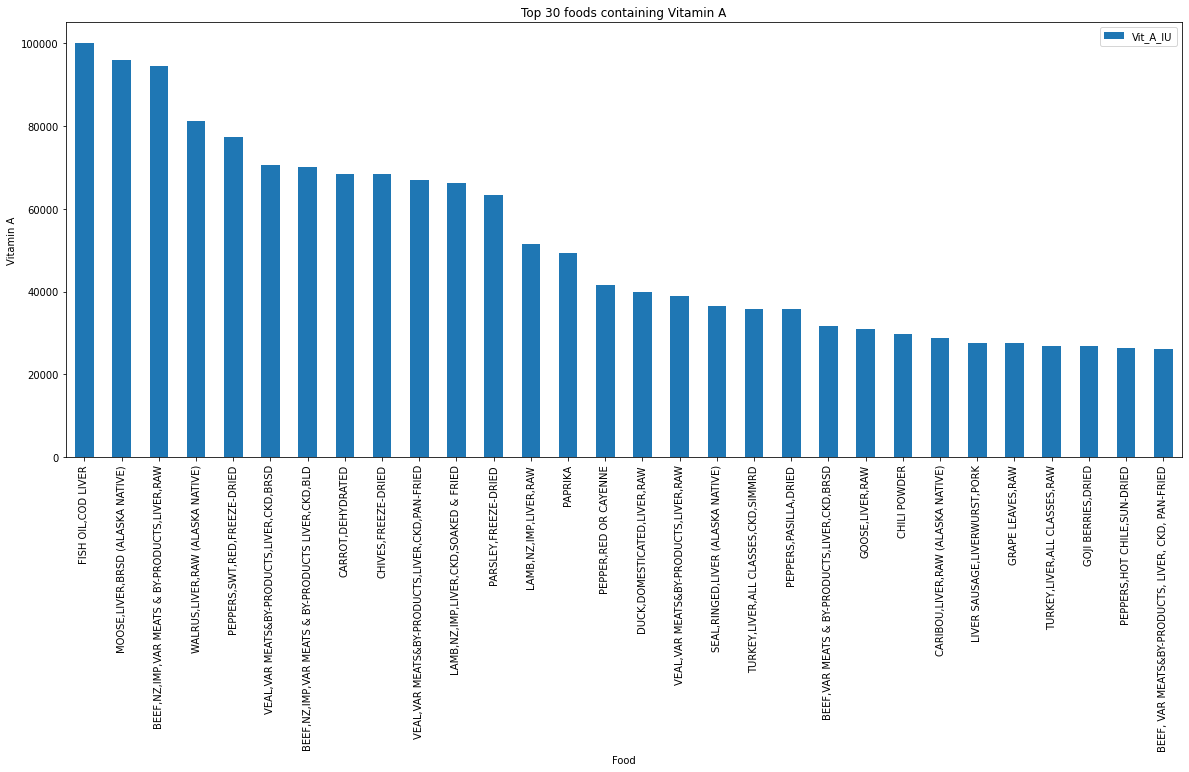

In [27]:
df_vitamin_A_top_30.plot(x='Shrt_Desc', y='Vit_A_IU',kind="bar",figsize=(20, 8))  
plt.xlabel('Food')
plt.xticks(rotation=90)
plt.ylabel('Vitamin A')
plt.title('Top 30 foods containing Vitamin A')
plt.show()

In [28]:
#Vitamin E:  Wheat Cream Oil and some brands of CEREALS

In [29]:
df_vitamin_E = df_vitamins[['Shrt_Desc','Vit_E_(mg)']]
df_vitamin_E_top_30 = df_vitamin_E.nlargest(30,'Vit_E_(mg)').reset_index(drop=True)
df_vitamin_E_top_30

,Shrt_Desc,Vit_E_(mg)
0,"OIL,WHEAT GERM",149.40
1,"CEREALS RTE,RALSTON ENR WHEAT BRAN FLAKES",80.46
2,"CEREALS RTE,KASHI HEART TO HEART,WARM CINN",61.00
3,"CEREALS RTE,KASHI HEART TO HEART,HONEY TSTD OAT",60.97
4,"BEVERAGES,UNILEVER,SLIMFAST SHAKE MIX,PDR,3-2-...",51.92
5,"BEVERAG,UNILEV,SLIMFAST SHAKE ,HI PROT,WHEY PD...",51.92
6,"BABYFOOD,CRL,WHL WHEAT,W/ APPLS,DRY FORT",50.00
7,"OIL,HAZELNUT",47.20
8,"CEREALS RTE,KELLOGG,KELLOGG'S ALL-BRAN COMPLET...",46.35
9,"CEREALS RTE,KELLOGG,KELLOGG'S PRODUCT 19",45.00


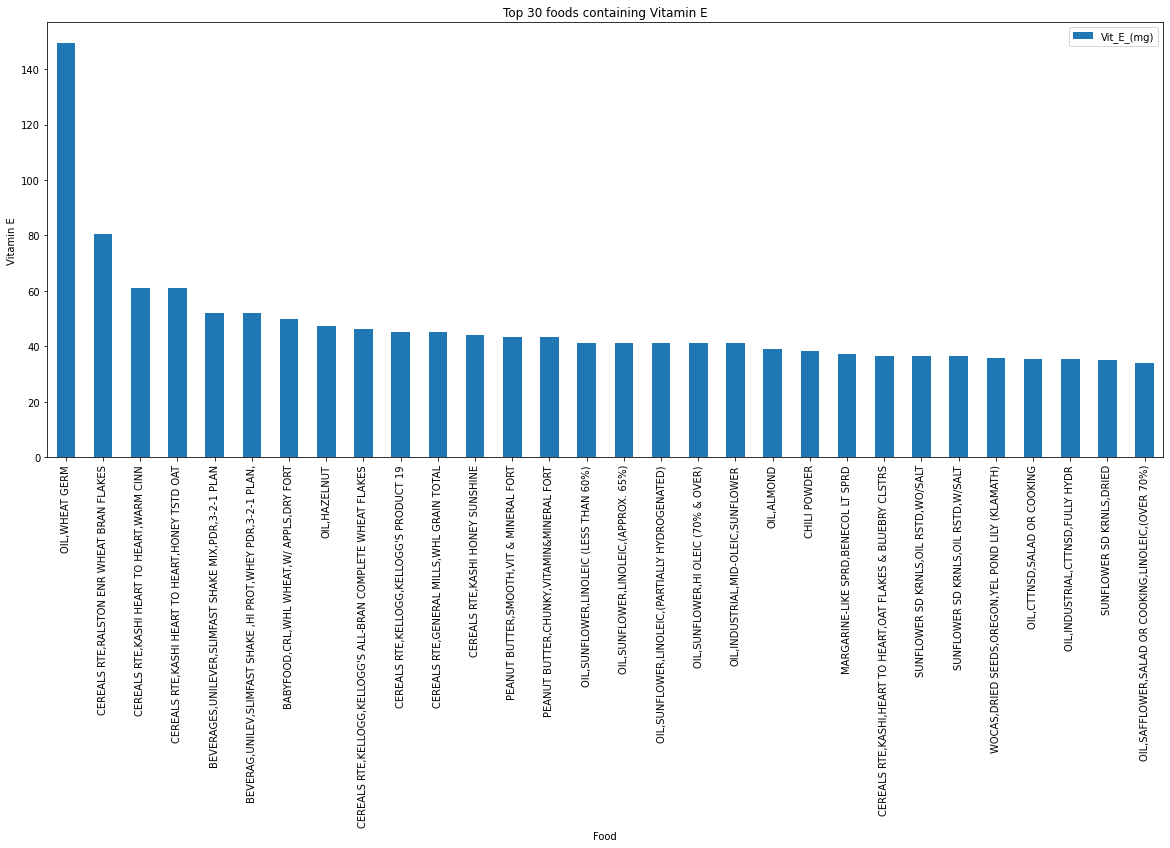

In [30]:
df_vitamin_E_top_30.plot(x='Shrt_Desc', y='Vit_E_(mg)',kind="bar",figsize=(20, 8))  
plt.xlabel('Food')
plt.xticks(rotation=90)
plt.ylabel('Vitamin E')
plt.title('Top 30 foods containing Vitamin E')
plt.show()

In [31]:
# Vitamin D: Cod Liver Fish Oil and , YES, again, and some kinds of shrooms.

In [32]:
df_vitamin_D = df_vitamins[['Shrt_Desc','Vit_D_µg']]
df_vitamin_D_top_30 = df_vitamin_D.nlargest(30,'Vit_D_µg').reset_index(drop=True)
df_vitamin_D_top_30

,Shrt_Desc,Vit_D_µg
0,"FISH OIL,COD LIVER",250.0
1,"MUSHROOMS,BROWN,ITALIAN,OR CRIMINI,EXPOSED TO ...",31.9
2,"MUSHROOMS,PORTABELLA,EXPOSED TO UV LT,RAW",28.4
3,"MUSHROOMS,MAITAKE,RAW",28.1
4,"HALIBUT,GREENLAND,RAW",27.4
5,"MUSHROOM,WHITE,EXPOSED TO UV LT,RAW",26.2
6,"MACKEREL,SALTED",25.2
7,"CARP,RAW",24.7
8,"EEL,MIXED SPECIES,RAW",23.3
9,"SALMON,SOCKEYE,CND,DRND SOL,WO/ SKN & BONES",21.5


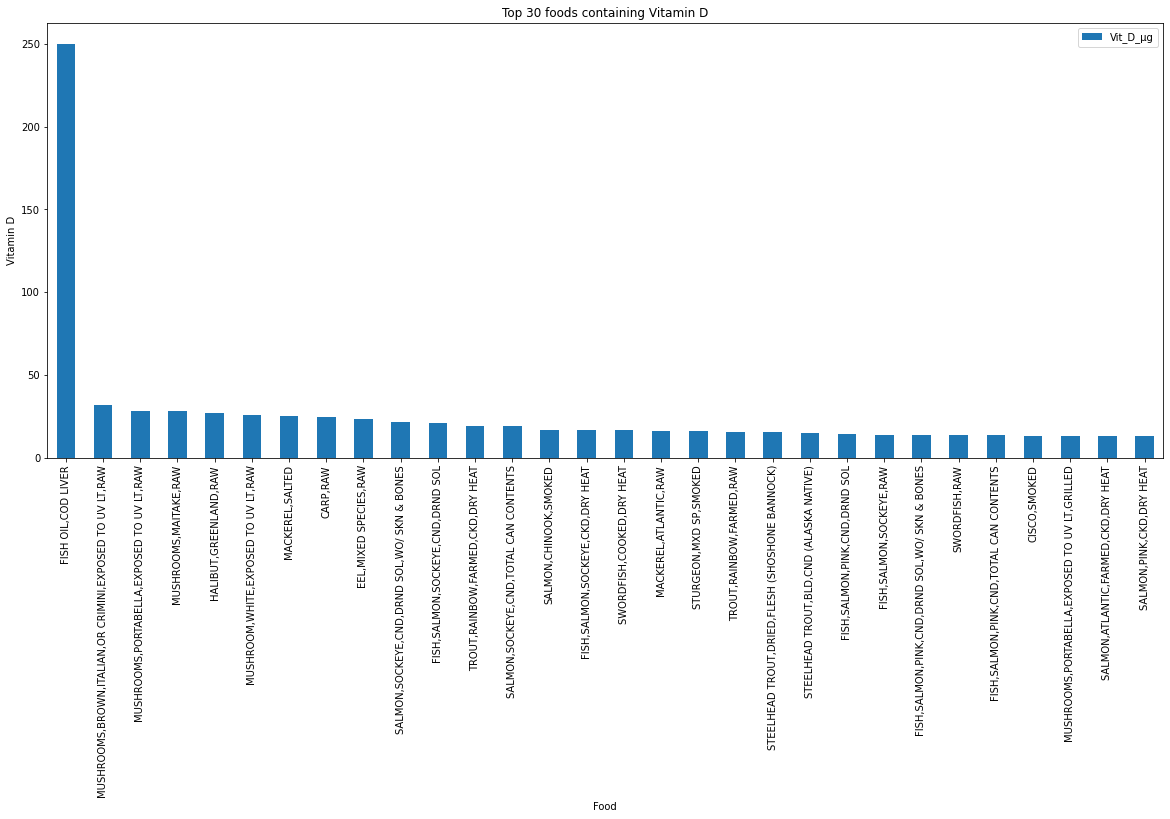

In [33]:
df_vitamin_D_top_30.plot(x='Shrt_Desc', y='Vit_D_µg',kind="bar",figsize=(20, 8))  
plt.xlabel('Food')
plt.xticks(rotation=90)
plt.ylabel('Vitamin D')
plt.title('Top 30 foods containing Vitamin D')
plt.show()

In [34]:
# Vitamin K: Dried Basil,Ground Sage

In [35]:
df_vitamin_K = df_vitamins[['Shrt_Desc','Vit_K_(µg)']]
df_vitamin_K_top_30 = df_vitamin_K.nlargest(30,'Vit_K_(µg)').reset_index(drop=True)
df_vitamin_K_top_30

,Shrt_Desc,Vit_K_(µg)
0,"SPICES,BASIL,DRIED",1714.5
1,"SAGE,GROUND",1714.5
2,"SPICES,THYME,DRIED",1714.5
3,"PARSLEY,FRSH",1640.0
4,"CORIANDER LEAF,DRIED",1359.5
5,"PARSLEY,DRIED",1359.5
6,"AMARANTH LEAVES,RAW",1140.0
7,"KALE,FRZ,CKD,BLD,DRND,WO/SALT",882.0
8,"KALE,FRZ,CKD,BLD,DRND,W/SALT",882.0
9,"CHARD,SWISS,RAW",830.0


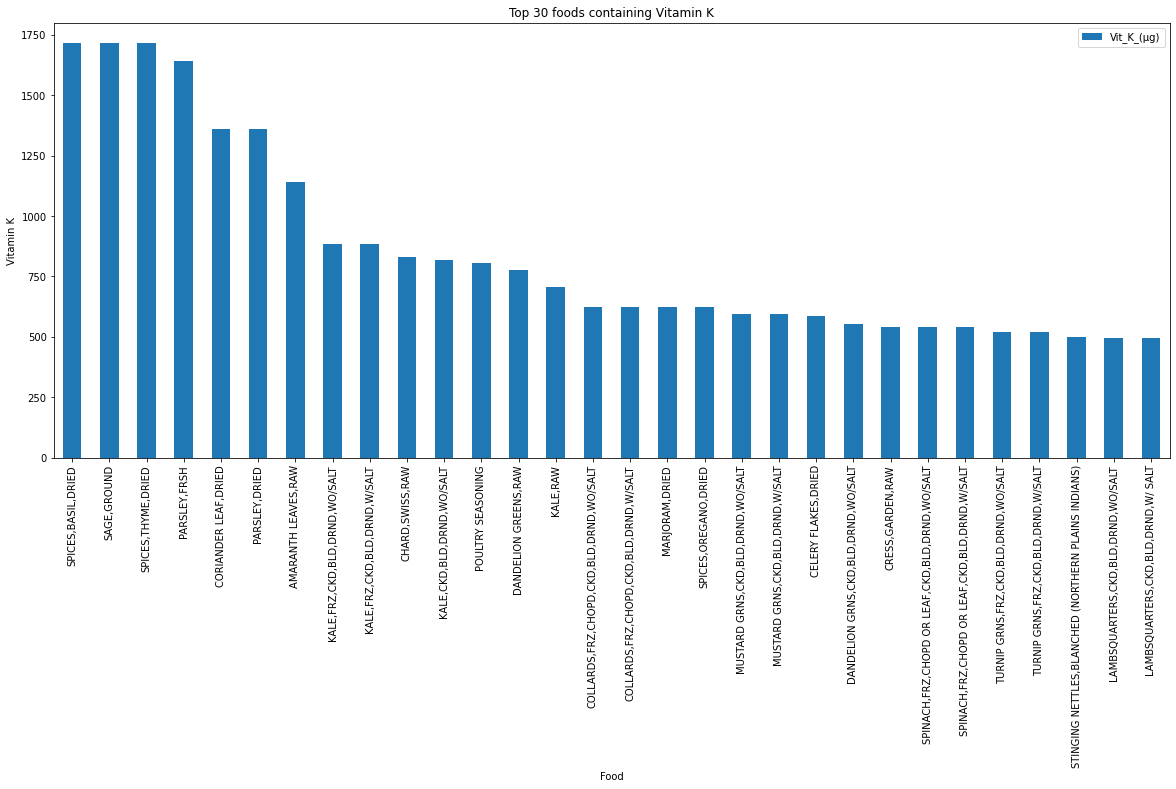

In [36]:
df_vitamin_K_top_30.plot(x='Shrt_Desc', y='Vit_K_(µg)',kind="bar",figsize=(20, 8))  
plt.xlabel('Food')
plt.xticks(rotation=90)
plt.ylabel('Vitamin K')
plt.title('Top 30 foods containing Vitamin K')
plt.show()

In [37]:
# Vitamin C: Baby foods apparently....

In [38]:
df_vitamin_C = df_vitamins[['Shrt_Desc','Vit_C_(mg)']]
df_vitamin_C_top_30 = df_vitamin_C.nlargest(30,'Vit_C_(mg)').reset_index(drop=True)
df_vitamin_C_top_30

,Shrt_Desc,Vit_C_(mg)
0,"BABYFOOD,GERBER,2ND FOODS,APPL,CARROT & SQUASH...",2732.0
1,"BEVERAGES,ORANGE-FLAVOR DRK,BRKFST TYPE,LO CAL...",2400.0
2,"BEVER,FRUIT-FLAV DRK,PDR,W/ HI VIT C W/ OTHER ...",2400.0
3,"PEPPERS,SWT,GRN,FREEZE-DRIED",1900.0
4,"PEPPERS,SWT,RED,FREEZE-DRIED",1900.0
5,"ACEROLA,(WEST INDIAN CHERRY),RAW",1677.6
6,"ACEROLA JUICE,RAW",1600.0
7,"BEVERAGES,TEA,GRN,INST,DECAFFEI,LEMON,UNSWTND,...",1342.3
8,"CHIVES,FREEZE-DRIED",660.0
9,"CORIANDER LEAF,DRIED",566.7


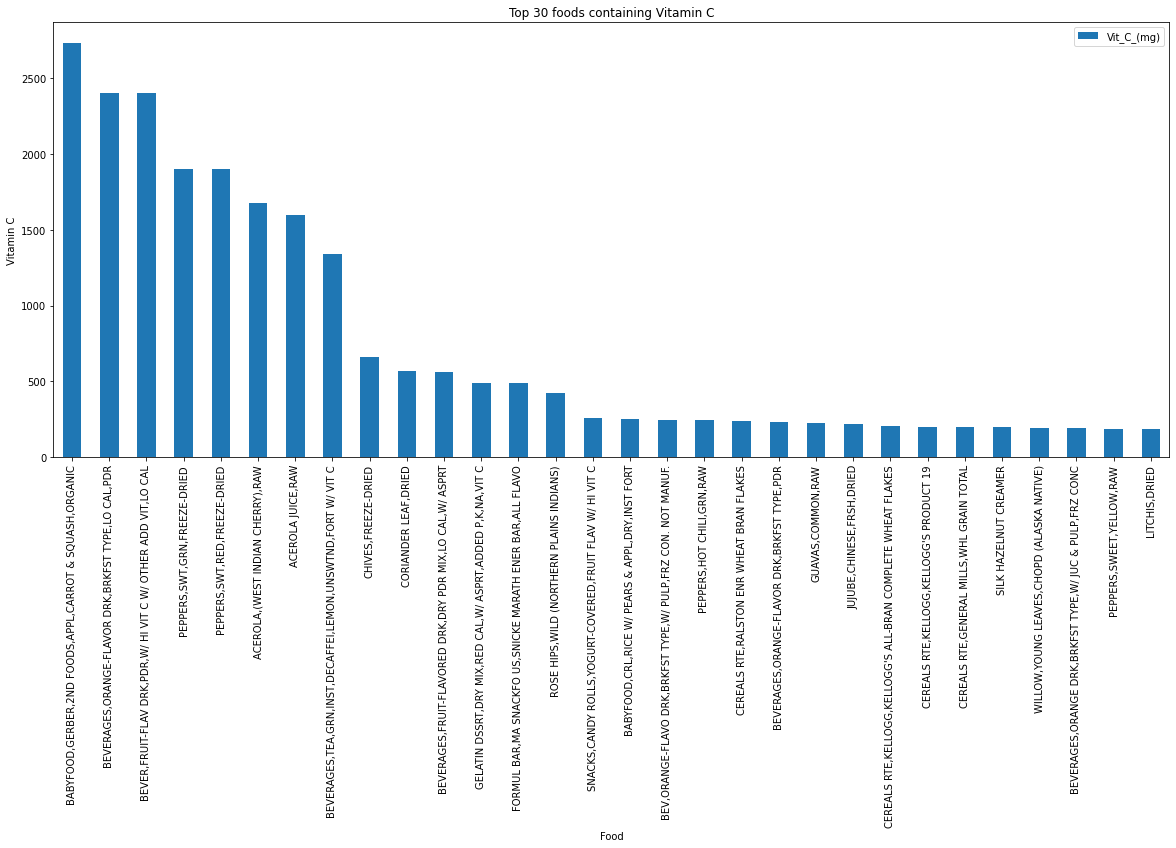

In [39]:
df_vitamin_C_top_30.plot(x='Shrt_Desc', y='Vit_C_(mg)',kind="bar",figsize=(20, 8))  
plt.xlabel('Food')
plt.xticks(rotation=90)
plt.ylabel('Vitamin C')
plt.title('Top 30 foods containing Vitamin C')
plt.show()

In [40]:
# Vitamin B6: Cereals

In [41]:
df_vitamin_B6 = df_vitamins[['Shrt_Desc','Vit_B6_(mg)']]
df_vitamin_B6_top_30 = df_vitamin_B6.nlargest(30,'Vit_B6_(mg)').reset_index(drop=True)
df_vitamin_B6_top_30

,Shrt_Desc,Vit_B6_(mg)
0,"CEREALS RTE,KELLOGG,KELLOGG'S ALL-BRAN ORIGINAL",12.000
1,"BEVERAGES,ORANGE-FLAVOR DRK,BRKFST TYPE,LO CAL...",8.000
2,"BEVER,FRUIT-FLAV DRK,PDR,W/ HI VIT C W/ OTHER ...",8.000
3,"CEREALS RTE,KELLOGG,KELLOGG'S ALL-BRAN COMPLET...",6.900
4,"CEREALS RTE,RALSTON ENR WHEAT BRAN FLAKES",6.800
5,"CEREALS RTE,KELLOGG,KELLOGG'S ALL-BRAN BRAN BUDS",6.670
6,"CEREALS RTE,KELLOGG,KELLOGG'S PRODUCT 19",6.670
7,"CEREALS RTE,GENERAL MILLS,WHL GRAIN TOTAL",6.667
8,"CEREALS RTE,KELLOGG,KELLOGG'S SPL K",6.440
9,"CEREALS RTE,KASHI HEART TO HEART,HONEY TSTD OAT",6.050


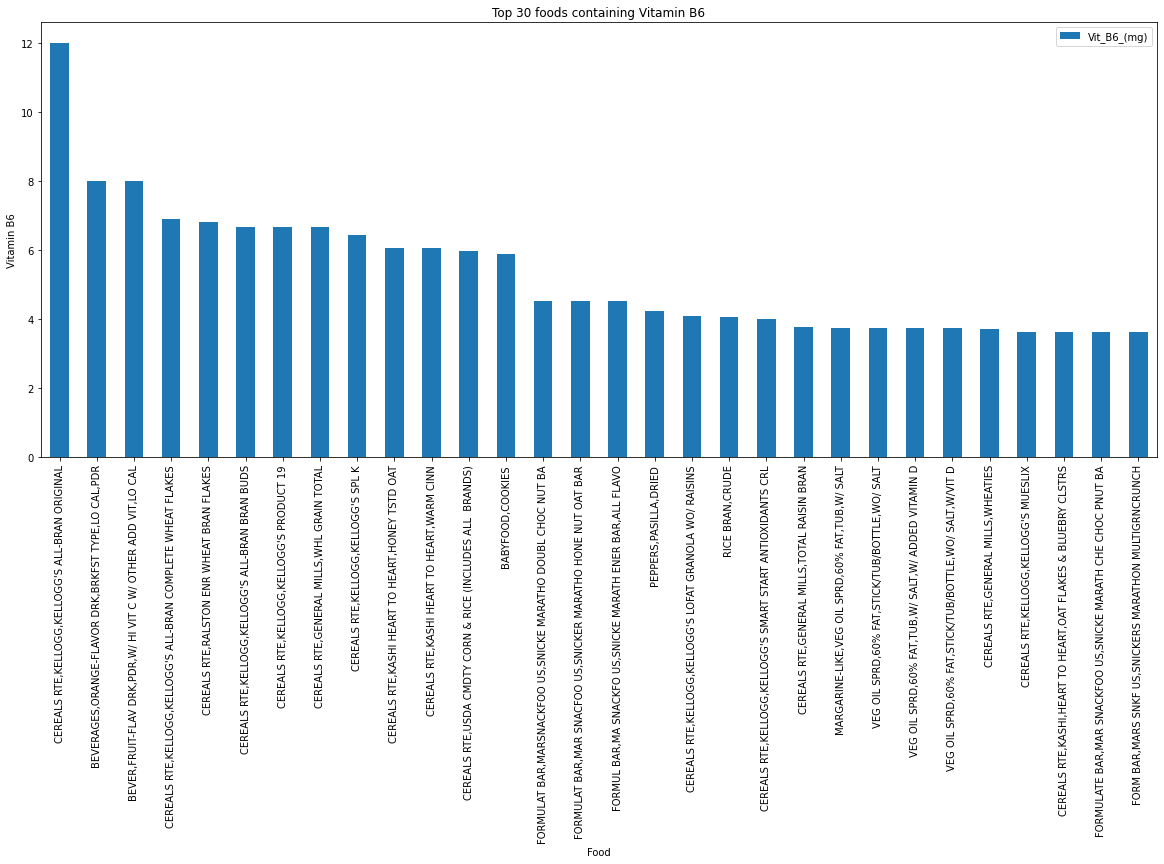

In [42]:
df_vitamin_B6_top_30.plot(x='Shrt_Desc', y='Vit_B6_(mg)',kind="bar",figsize=(20, 8))  
plt.xlabel('Food')
plt.xticks(rotation=90)
plt.ylabel('Vitamin B6')
plt.title('Top 30 foods containing Vitamin B6')
plt.show()

In [43]:
#Vitamin B12: Clams and alot of Animal Liver (mostly raw)

In [44]:
df_vitamin_B12 = df_vitamins[['Shrt_Desc','Vit_B12_(µg)']]
df_vitamin_B12_top_30 = df_vitamin_B12.nlargest(30,'Vit_B12_(µg)').reset_index(drop=True)
df_vitamin_B12_top_30

,Shrt_Desc,Vit_B12_(µg)
0,"CLAM,MXD SP,CKD,MOIST HEAT",98.89
1,"BEEF,NZ,IMP,VAR MEATS & BY-PRODUCTS LIVER,CKD,BLD",96.00
2,"LAMB,VAR MEATS&BY-PRODUCTS,LIVER,RAW",90.05
3,"LAMB,VAR MEATS&BY-PRODUCTS,LIVER,CKD,PAN-FRIED",85.70
4,"VEAL,VAR MEATS&BY-PRODUCTS,LIVER,CKD,BRSD",84.60
5,"BEEF,NZ,IMP,VAR MEATS & BY-PRODUCTS,LIVER,RAW",84.50
6,"BEEF, VAR MEATS&BY-PRODUCTS, LIVER, CKD, PAN-F...",83.13
7,"LAMB,VAR MEATS&BY-PRODUCTS,KIDNEYS,CKD,BRSD",78.90
8,"LAMB,VAR MEATS&BY-PRODUCTS,LIVER,CKD,BRSD",76.50
9,"VEAL,VAR MEATS&BY-PRODUCTS,LIVER,CKD,PAN-FRIED",72.50


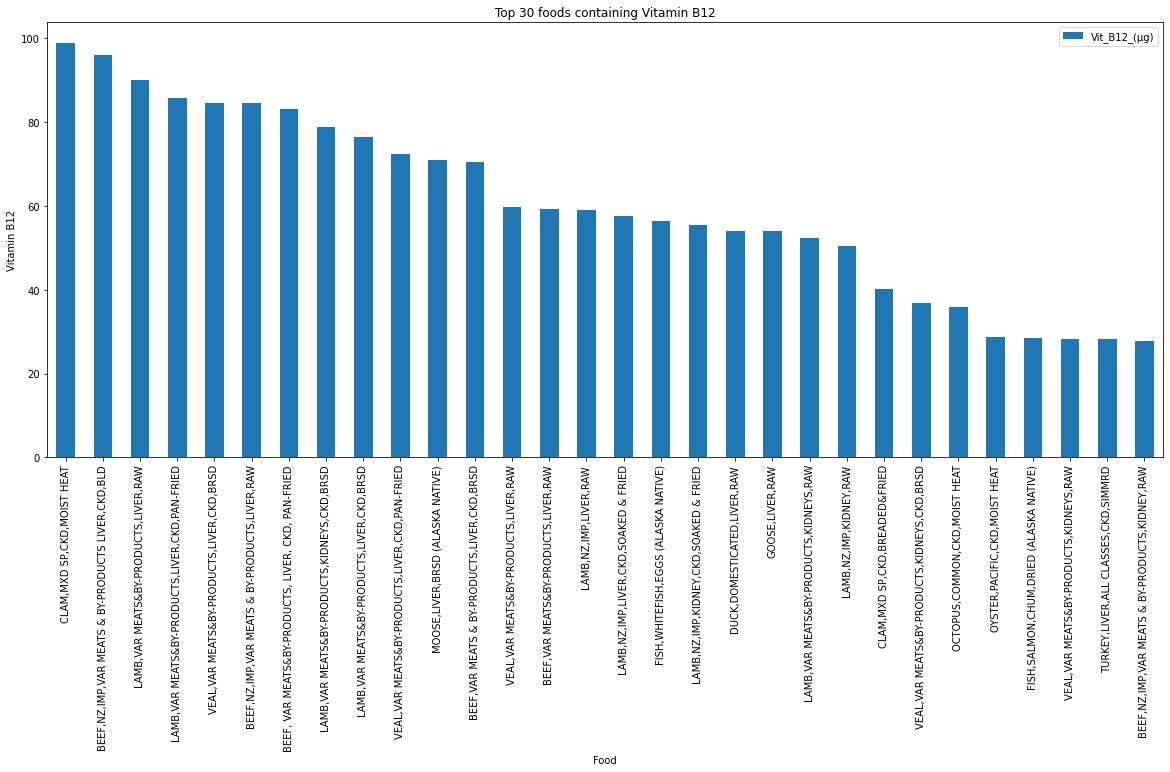

In [45]:

df_vitamin_B12_top_30.plot(x='Shrt_Desc', y='Vit_B12_(µg)',kind="bar",figsize=(20, 8))  
plt.xlabel('Food')
plt.xticks(rotation=90)
plt.ylabel('Vitamin B12')
plt.title('Top 30 foods containing Vitamin B12')
plt.show()

In [46]:
# Let's try stacking those in a single DataFrame so we can point out the foods that may contain the most vitamins.

In [47]:
vitamins = pd.concat([df_vitamin_A_top_30, df_vitamin_E_top_30,df_vitamin_D_top_30,df_vitamin_K_top_30,df_vitamin_C_top_30,df_vitamin_B6_top_30,df_vitamin_B12_top_30],axis=0).reset_index(drop=True)
vitamins

,Shrt_Desc,Vit_A_IU,Vit_E_(mg),Vit_D_µg,Vit_K_(µg),Vit_C_(mg),Vit_B6_(mg),Vit_B12_(µg)
0,"FISH OIL,COD LIVER",100000.0,NaN,NaN,NaN,NaN,NaN,NaN
1,"MOOSE,LIVER,BRSD (ALASKA NATIVE)",96000.0,NaN,NaN,NaN,NaN,NaN,NaN
2,"BEEF,NZ,IMP,VAR MEATS & BY-PRODUCTS,LIVER,RAW",94398.0,NaN,NaN,NaN,NaN,NaN,NaN
3,"WALRUS,LIVER,RAW (ALASKA NATIVE)",81200.0,NaN,NaN,NaN,NaN,NaN,NaN
4,"PEPPERS,SWT,RED,FREEZE-DRIED",77261.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
205,"OYSTER,PACIFIC,CKD,MOIST HEAT",NaN,NaN,NaN,NaN,NaN,NaN,28.80
206,"FISH,SALMON,CHUM,DRIED (ALASKA NATIVE)",NaN,NaN,NaN,NaN,NaN,NaN,28.60
207,"VEAL,VAR MEATS&BY-PRODUCTS,KIDNEYS,RAW",NaN,NaN,NaN,NaN,NaN,NaN,28.20
208,"TURKEY,LIVER,ALL CLASSES,CKD,SIMMRD",NaN,NaN,NaN,NaN,NaN,NaN,28.17


In [48]:
#So let's see which foods have more than one type of vitamin in it by displaying the duplicates only.

In [49]:
vitamins = vitamins[vitamins.duplicated('Shrt_Desc')]
vitamins.fillna(0, inplace=True)
vitamins

,Shrt_Desc,Vit_A_IU,Vit_E_(mg),Vit_D_µg,Vit_K_(µg),Vit_C_(mg),Vit_B6_(mg),Vit_B12_(µg)
50,CHILI POWDER,0.0,38.14,0.0,0.0,0.0,0.000,0.00
60,"FISH OIL,COD LIVER",0.0,0.00,250.0,0.0,0.0,0.000,0.00
124,"PEPPERS,SWT,RED,FREEZE-DRIED",0.0,0.00,0.0,0.0,1900.0,0.000,0.00
128,"CHIVES,FREEZE-DRIED",0.0,0.00,0.0,0.0,660.0,0.000,0.00
129,"CORIANDER LEAF,DRIED",0.0,0.00,0.0,0.0,566.7,0.000,0.00
138,"CEREALS RTE,RALSTON ENR WHEAT BRAN FLAKES",0.0,0.00,0.0,0.0,239.7,0.000,0.00
142,"CEREALS RTE,KELLOGG,KELLOGG'S ALL-BRAN COMPLET...",0.0,0.00,0.0,0.0,207.0,0.000,0.00
143,"CEREALS RTE,KELLOGG,KELLOGG'S PRODUCT 19",0.0,0.00,0.0,0.0,200.0,0.000,0.00
144,"CEREALS RTE,GENERAL MILLS,WHL GRAIN TOTAL",0.0,0.00,0.0,0.0,200.0,0.000,0.00
151,"BEVERAGES,ORANGE-FLAVOR DRK,BRKFST TYPE,LO CAL...",0.0,0.00,0.0,0.0,0.0,8.000,0.00


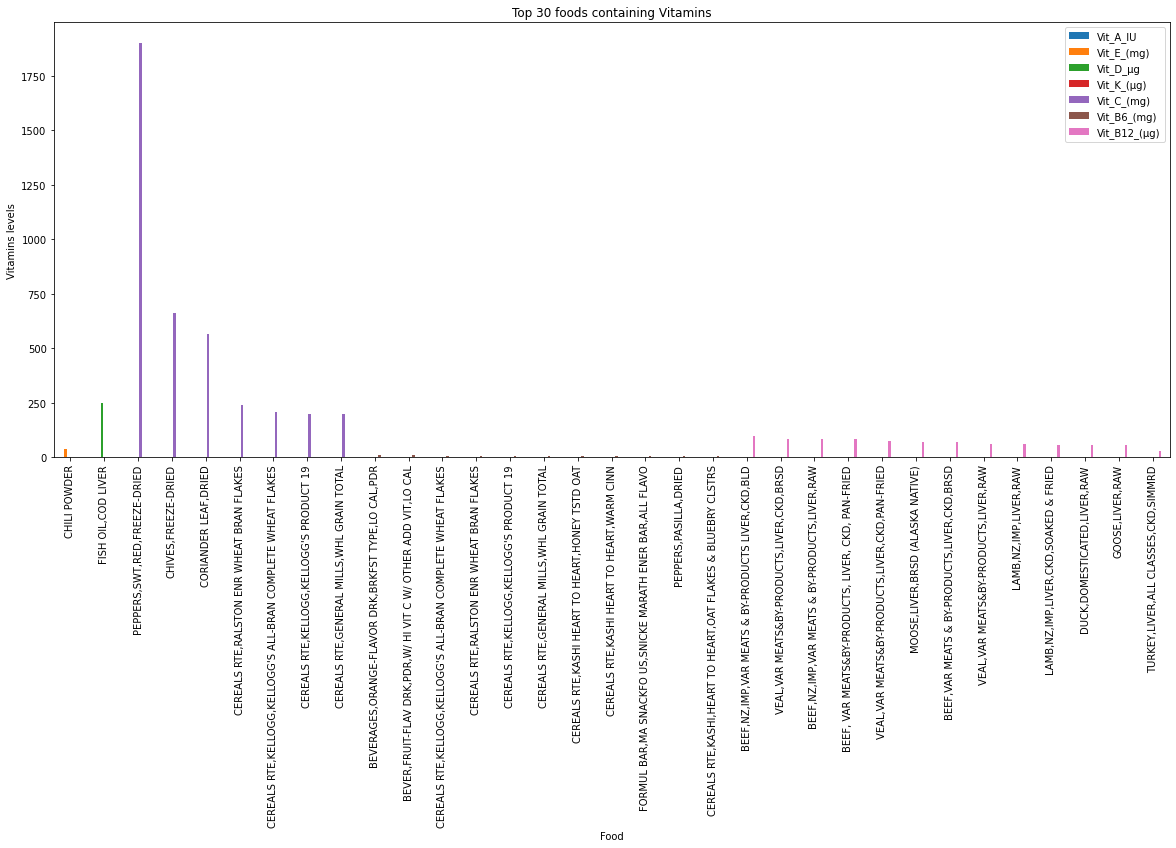

In [50]:
vitamins.plot(x='Shrt_Desc', y=['Vit_A_IU','Vit_E_(mg)','Vit_D_µg','Vit_K_(µg)','Vit_C_(mg)','Vit_B6_(mg)','Vit_B12_(µg)'],kind="bar",figsize=(20, 8))
plt.xlabel('Food')
plt.xticks(rotation=90)
plt.ylabel('Vitamins levels')
plt.title('Top 30 foods containing Vitamins')
plt.show()

In [51]:
#So it seems  Papers, Chilli Powder,Fish Oil(fish generaly),Coriander,Chives,Cereals and a lot of Liver can provide decent amount of vitamins. 
#I wonder if I can make a stew of all of those... And don't forget your very special dessert...dehydrated apples :)
#I will continue the work over the dataset and update the code. 
#Thank you for checking this out.
#Thank you for the wonderful dataset.